<a href="https://colab.research.google.com/github/raulbenitez/UPT_ML/blob/main/top_songs_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset

In [1]:
import pandas as pd

df = pd.read_csv('/content/Popular_Spotify_Songs.csv',encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [14]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


get the top 5% quantiles

In [15]:
df.quantile(0.95)

<ipython-input-15-95e7eb97ac26>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.95)


artist_count                3.0
released_year            2023.0
released_month             12.0
released_day               29.0
in_spotify_playlists    22267.4
in_spotify_charts          50.0
in_apple_playlists        241.4
in_apple_charts           142.4
in_deezer_charts           15.0
bpm                       174.0
danceability_%             89.0
valence_%                  90.0
energy_%                   89.0
acousticness_%             81.4
instrumentalness_%          5.0
liveness_%                 44.4
speechiness_%              33.0
Name: 0.95, dtype: float64

Get the songs that are top 5% in both spotify and apple playlist presence

In [16]:
df1 = df.loc[(df['in_spotify_playlists']>df['in_spotify_playlists'].quantile(0.95))&(df['in_apple_playlists']>df['in_apple_playlists'].quantile(0.95))]
df1.shape

(23, 24)

List the top 10 songs that have a larger playilist presence

In [17]:
df2 = df1.sort_values(by='in_spotify_playlists')
df2.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,...,81,B,Major,76,53,53,44,0,9,9
762,Love Yourself,Justin Bieber,1,2015,11,9,22730,5,2123309722,289,...,100,E,Major,61,53,38,84,0,28,44
724,Something Just Like This,"The Chainsmokers, Coldplay",2,2017,2,22,23375,21,2204080728,336,...,103,B,Minor,61,47,65,3,0,17,4
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,174,F#,Minor,52,66,73,34,0,31,6
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
441,All I Want for Christmas Is You,Mariah Carey,1,1994,10,28,25653,0,1449779435,387,...,150,G,Major,34,33,63,16,0,7,4
407,Don't Start Now,Dua Lipa,1,2019,10,31,27119,0,2303033973,532,...,124,B,Minor,79,68,79,1,0,10,8
623,All of Me,John Legend,1,2013,8,1,27221,0,2086124197,308,...,120,G#,Major,42,33,26,92,0,13,3
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",2,2017,6,2,27705,10,1897517891,537,...,124,A,Minor,79,59,86,4,0,8,11


visualize 2d data in the space of spotify and apple playlist presence

In [19]:
df4 = df[['in_spotify_playlists','in_apple_playlists']]
df4.head()

,in_spotify_playlists,in_apple_playlists
0,553,43
1,1474,48
2,1397,94
3,7858,116
4,3133,84


<Axes: xlabel='in_spotify_playlists', ylabel='in_apple_playlists'>

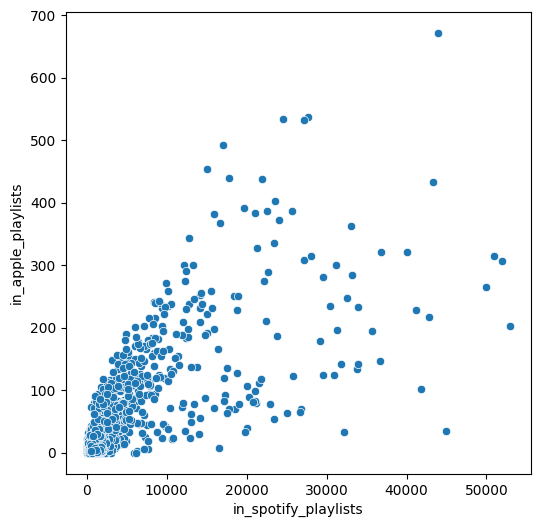

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
sns.scatterplot(x='in_spotify_playlists',y='in_apple_playlists',data=df4)